In [59]:
import pandas as pd

In [60]:
df = pd.read_csv('iris.csv', index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


- Species = 0 Setosa
- Species = 1 Versicolor
- Species = 2 Virginica

In [61]:
df.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [62]:
X = df.iloc[:, 2:-1]

In [63]:
X.head()

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


In [64]:
df.Species

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

In [76]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=3)

In [77]:
model.fit(X)

KMeans(n_clusters=3, random_state=3)

In [78]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
model.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.464     , 0.244     ],
       [5.59583333, 2.0375    ]])

In [80]:
import matplotlib.pyplot as plt
import numpy as np

In [81]:
color = np.array(['red', 'blue', 'green','yellow','pink', 'black'])

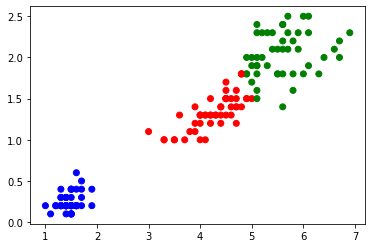

In [82]:
plt.scatter(x=df.PetalLengthCm, y = df.PetalWidthCm, c=color[model.labels_])

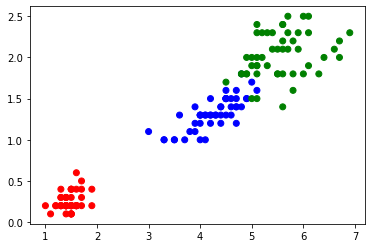

In [45]:
plt.scatter(x=df.PetalLengthCm, y = df.PetalWidthCm, c=color[df.Species])

# Elbow Method

In [46]:
# cdist will be used to calculate distances between points and centroids
from scipy.spatial.distance import cdist

In [48]:
X.head()

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


In [49]:
# all the of the calculated distances with different values of K will be stored in this list
error = []

In [52]:
# repeat for values of K = 1 to K = 14
for k in range(1,15):
    # initalize the model with the value of k
    kmeanmodel = KMeans(n_clusters=k)
    # fit the data
    kmeanmodel.fit(X)
    # calculate the distance using cdist
    # find the minimum (because an element will belong to closest cluster)
    # and sum up all the distances
    dist = sum(np.min( cdist(X, kmeanmodel.cluster_centers_),axis=1)/X.shape[0] )
    # put the distance error in the error list
    error.append(dist)

In [58]:
error

[1.7069324035460889,
 0.584392506331517,
 0.36925710319739746,
 0.29971489163499454,
 0.2655741264274259,
 0.23406659882774242,
 0.21322375601799115,
 0.1957725894444692,
 0.18459547737579274,
 0.17332446436312812,
 0.16464402619400584,
 0.15899423590273967,
 0.15158956994372894,
 0.1418005559574646]

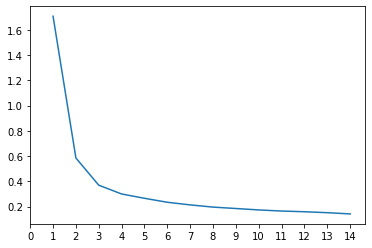

In [83]:
# plot the results of elbow method
plt.plot(range(1,15), error)
plt.xticks(range(0,15))
plt.show()

In [ ]:
# in this case, we see an appopriate number of K should be 3 as it provides a nice balance